This notebook for Stardist applicationis adoptted from https://github.com/stardist/stardist/blob/main/examples/2D/3_prediction.ipynb

Students can use this as an initial notebook for more images with specific models and parameters.

Liya Ding 2024.10.01

In [1]:
import sys
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread, imwrite
from csbdeep.utils import normalize
from csbdeep.utils import download_and_extract_zip_file

from stardist import random_label_cmap, _draw_polygons
from stardist.models import StarDist2D

np.random.seed(6)
lbl_cmap = random_label_cmap()

In [17]:
# read in image sequence ( get the data ready with the "get_images.ipynb" in data preparation part and use the correct path)
filenames = sorted(glob('D:\lding\dsi_clinic\cellsegmentation\data\\tissuenet_v1.1\\tissuenet_v1.1_test\img_C0\*.tiff'))
images = list(map(imread,filenames))

### Segmentation with Stardist pretrained models


In [19]:
# Load pre-trained model named "2D_demo"
model = StarDist2D.from_pretrained('2D_demo')

Found model '2D_demo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.486166, nms_thresh=0.5.


In [20]:
# normalize image and run prediction
img = normalize(images[16], 1,99.8)
labels, details = model.predict_instances(img)

(-0.5, 255.5, 255.5, -0.5)

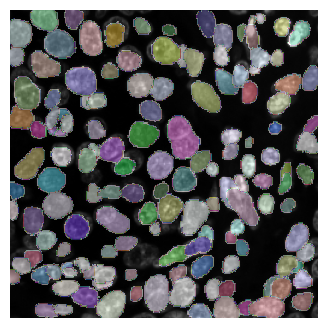

In [21]:
# display image and overlay labels(segmented cells) in different colors
plt.figure(figsize=(4,4))
plt.imshow(img if img.ndim==2 else img[...,0], clim=(0,1), cmap='gray')
plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
plt.axis('off')

In [30]:
# save the segmentation results -- the labels, to a tif file for future evaluation 
output_dir = 'D:\lding\dsi_clinic\cellsegmentation\data\\tissuenet_v1.1\\tissuenet_v1.1_test\C0_selected_seg_stardist'
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

imwrite(os.path.join(output_dir, 'testimage_labels.tif'), labels)

### Or wrap these into a function to make test more convenient

In [23]:
def example(model, i, show_dist=True):
    img = normalize(images[i], 1,99.8, axis=[0,1])
    labels, details = model.predict_instances(img)

    plt.figure(figsize=(7,5))
    img_show = img if img.ndim==2 else img[...,0]
    coord, points, prob = details['coord'], details['points'], details['prob']
    plt.subplot(121); plt.imshow(img_show, cmap='gray'); plt.axis('off')
    a = plt.axis()
    _draw_polygons(coord, points, prob, show_dist=show_dist)
    plt.axis(a)
    plt.subplot(122); plt.imshow(img_show, cmap='gray'); plt.axis('off')
    plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
    plt.tight_layout()
    plt.show()

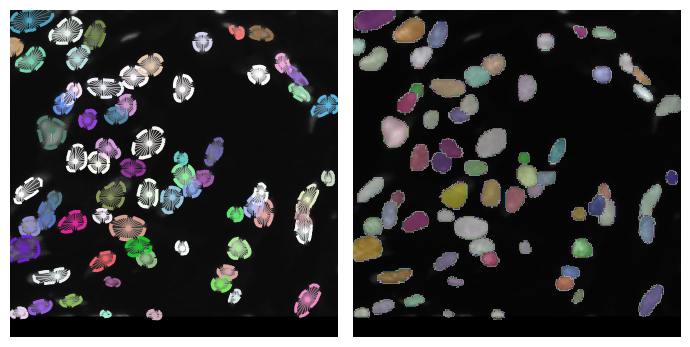

In [24]:
# run current model for image number 42
example(model, 42)

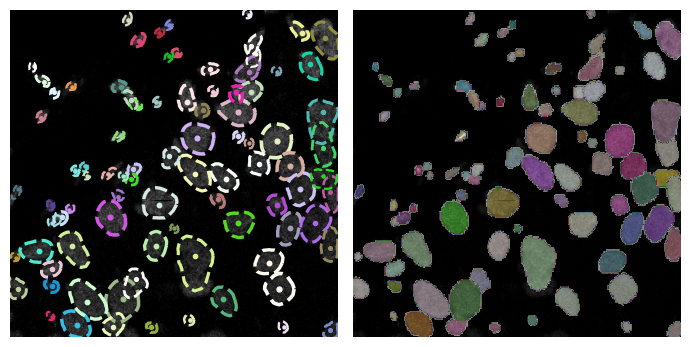

In [29]:
# run current model for image number 1 without displaying the boundary distances
example(model, 162, False)

In [26]:
# load another pretrained model 
model_versatile = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


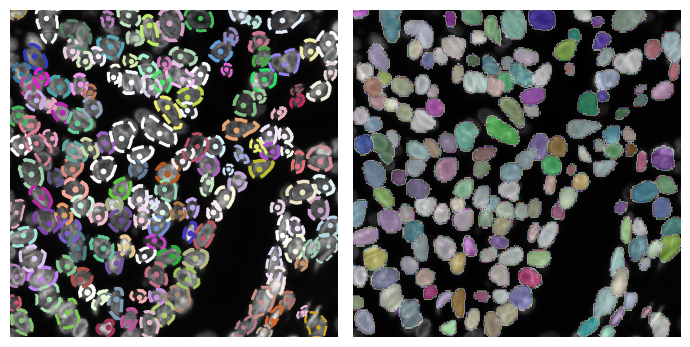

In [27]:
# run model '2D_versatile_fluo' for image number 30 without displaying the boundary distances
example(model_versatile, 30, False)